In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import xarray as xr

# Initial conditions

In [2]:
dx, dz = 0.05, 20

X = np.arange(-81.5, -78.5, dx)
Y = 26.7*np.ones(X.shape)
Z = np.ones(X.shape)

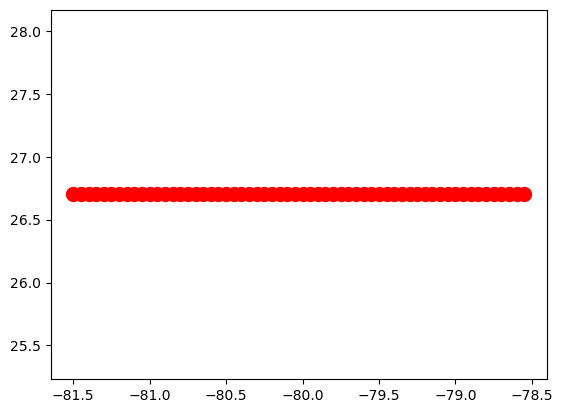

In [3]:
plt.scatter(X, Y, c='r', s=100)

In [143]:
mesh_file = '/storage/shared/oceanparcels/input_data/NEMO_Ensemble/GRID/coordinates_NATL025_v2.nc'
mask_file = '/storage/shared/oceanparcels/input_data/NEMO_Ensemble/GRID/NATL025-CJMenobs01_byte_mask.nc'

mesh = xr.open_dataset(mesh_file, decode_times=False)
mask = xr.open_dataset(mask_file, decode_times=False)

field = xr.open_dataset('/storage/shared/oceanparcels/input_data/NEMO_Ensemble/NATL025-CJMCYC3.023-S/1d/2011/NATL025-CJMCYC3.023_y2011m01.1d_gridV.nc')

In [144]:
field

<xarray.Dataset> Size: 2GB
Dimensions:               (depthv: 46, y: 530, x: 486, time_counter: 31,
                           axis_nbounds: 2)
Coordinates:
  * depthv                (depthv) float32 184B 3.047 9.454 ... 5.875e+03
    nav_lat               (y, x) float32 1MB ...
    nav_lon               (y, x) float32 1MB ...
    time_centered         (time_counter) datetime64[ns] 248B ...
  * time_counter          (time_counter) datetime64[ns] 248B 2011-01-01T12:00...
Dimensions without coordinates: y, x, axis_nbounds
Data variables:
    sometauy              (time_counter, y, x) float32 32MB ...
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] 496B ...
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] 496B ...
    vomecrty              (time_counter, depthv, y, x) float32 1GB ...
Attributes:
    description:       ocean V grid variables
    title:             ocean V grid variables
    Conventions:       CF-1.5
    production:        An IPSL model
    start_date:        19830101
    output_frequency:  1d
    CONFIG:            NATL025
    CASE:              CJMCYC3.023
    history:           Sun Aug 19 09:14:08 2018: ncks -O -F -d time_counter,1...
    NCO:               4.1.0

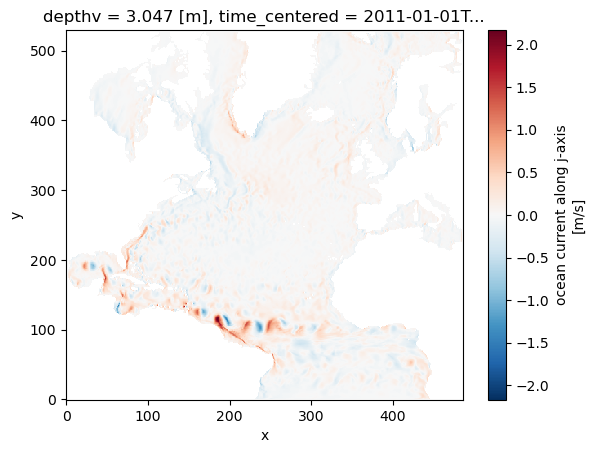

In [145]:
field['vomecrty'][0,0,:,:].plot()

In [146]:
lons = mesh['nav_lon'].shape
lats = mesh['nav_lat'].shape



/tmp/ipykernel_27150/2645518184.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im = ax.pcolormesh(mesh['nav_lon'], mesh['nav_lat'], field['vomecrty'][0,depth,:,:], cmap='viridis')
/tmp/ipykernel_27150/2645518184.py:5: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(mesh['nav_lon'], mesh['nav_lat'], mask['tmask'][0,depth,:,:], cmap='gray', alpha=0.5)


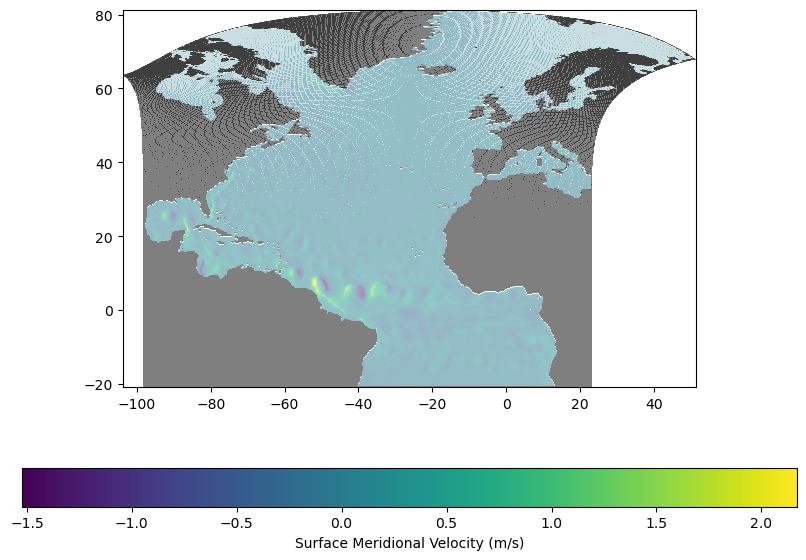

In [147]:
# plot field with pcolor mesh and add land mask 
depth = 0
fig, ax = plt.subplots(figsize=(10, 7))
im = ax.pcolormesh(mesh['nav_lon'], mesh['nav_lat'], field['vomecrty'][0,depth,:,:], cmap='viridis')
ax.pcolormesh(mesh['nav_lon'], mesh['nav_lat'], mask['tmask'][0,depth,:,:], cmap='gray', alpha=0.5)
# ax.set_xlim([-80, -78])
# ax.set_ylim([26, 28])
ax.set_aspect('equal')
fig.colorbar(im, ax=ax, label='Surface Meridional Velocity (m/s)', orientation='horizontal')


/tmp/ipykernel_27150/967287310.py:5: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im = ax.pcolormesh(mesh['nav_lon'], mesh['nav_lat'], field['vomecrty'][time,depth,:,:], cmap='viridis')
/tmp/ipykernel_27150/967287310.py:6: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0,depth,:,:], cmap='gray', alpha=0.5)


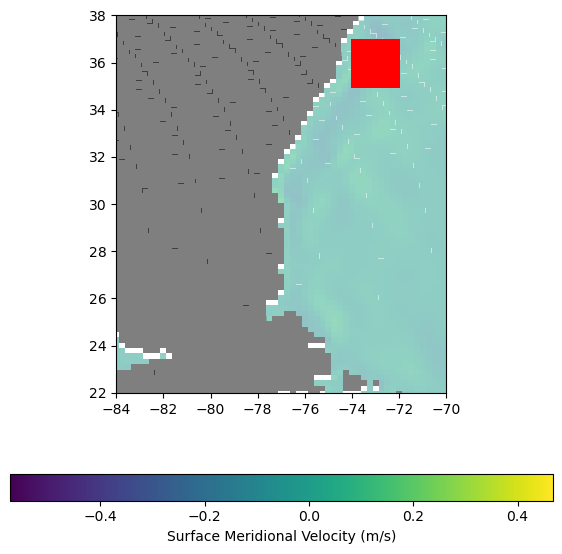

In [149]:
time = 5
depth = 26
fig, ax = plt.subplots(figsize=(7, 7))

im = ax.pcolormesh(mesh['nav_lon'], mesh['nav_lat'], field['vomecrty'][time,depth,:,:], cmap='viridis')
ax.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0,depth,:,:], cmap='gray', alpha=0.5)

ax.set_xlim([-84, -70])
ax.set_ylim([22, 38])
ax.set_aspect('equal')
fig.colorbar(im, ax=ax, label='Surface Meridional Velocity (m/s)', orientation='horizontal')


step=1/32.
min_lon = -74
max_lon = -72
min_lat = 35
max_lat = 37
min_depth = 0
max_depth = 1500
z_step = 100
p_lons, p_lats, p_depths = np.meshgrid(np.arange(min_lon, max_lon, step), 
                         np.arange(min_lat, max_lat, step),
                         np.arange(min_depth, max_depth, z_step))
ax.scatter(p_lons, p_lats, c='r', s=1)


In [208]:
len(p_lons.flatten())

61440

In [177]:
field['depthv'][26]

<xarray.DataArray 'depthv' ()> Size: 4B
array(1470.893, dtype=float32)
Coordinates:
    depthv   float32 4B 1.471e+03
Attributes:
    long_name:  Vertical V levels
    units:      m
    axis:       Z
    positive:   down

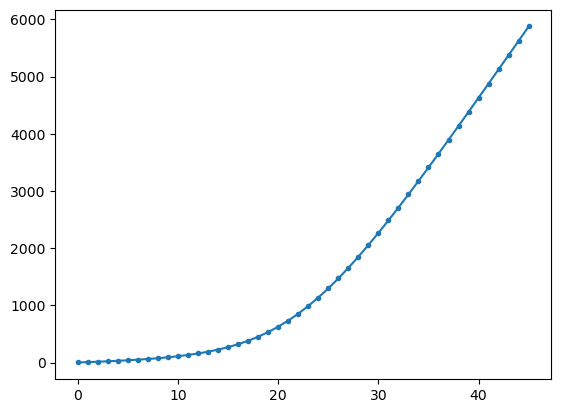

In [171]:
plt.plot(field['depthv'], '.-')

In [114]:
p_lons[::5, ::5].shape

(26, 26)

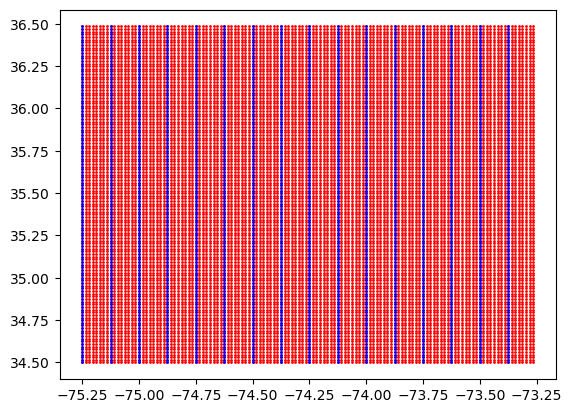

In [141]:
step=1/64.
min_lon = -75.25
max_lon = -73.25
min_lat = 34.5
max_lat = 36.5

p_lons, p_lats = np.meshgrid(np.arange(min_lon, max_lon, step), 
                         np.arange(min_lat, max_lat, step))
plt.scatter(p_lons, p_lats, c='r', s=1)
# select particles skiping 1 every 10

p_lons = p_lons.flatten()
p_lats = p_lats.flatten()

n = 8
plt.scatter(p_lons[::n], p_lats[::n], c='b', s=1)

In [104]:
1/32

3.125

In [143]:
len(p_lons.flatten())

4096

/tmp/ipykernel_8213/129703574.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im = ax.pcolormesh(mesh['nav_lon'], mesh['nav_lat'], field['vomecrty'][0,0,:,:], cmap='viridis')
/tmp/ipykernel_8213/129703574.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(mesh['nav_lon'], mesh['nav_lat'], mask['tmask'][0,0,:,:], cmap='gray', alpha=0.5)


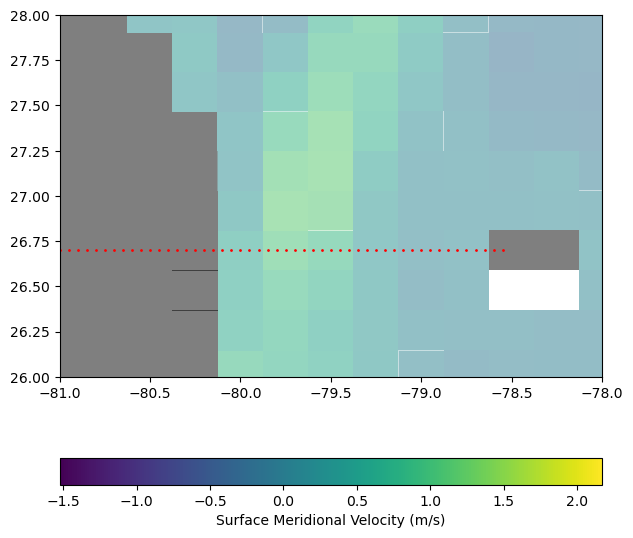

In [54]:
# plot field with pcolor mesh and add land mask 
fig, ax = plt.subplots(figsize=(7, 7))
im = ax.pcolormesh(mesh['nav_lon'], mesh['nav_lat'], field['vomecrty'][0,0,:,:], cmap='viridis')
ax.pcolormesh(mesh['nav_lon'], mesh['nav_lat'], mask['tmask'][0,0,:,:], cmap='gray', alpha=0.5)
ax.scatter(X, Y, c='r', s=1)

ax.set_xlim([-81, -78])
ax.set_ylim([26, 28])
ax.set_aspect('equal')
fig.colorbar(im, ax=ax, label='Surface Meridional Velocity (m/s)', orientation='horizontal')



In [3]:
# Checking the parcels outputs to recover the particles by the indexes corresponding to the grid

pset_1 = xr.open_zarr('/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/2010/PGS_2010_023.zarr')

In [4]:
pset_1

<xarray.Dataset> Size: 764MB
Dimensions:     (trajectory: 65536, obs: 364)
Coordinates:
  * obs         (obs) int32 1kB 0 1 2 3 4 5 6 7 ... 357 358 359 360 361 362 363
  * trajectory  (trajectory) int64 524kB 0 1 2 3 4 ... 65532 65533 65534 65535
Data variables:
    lat         (trajectory, obs) float64 191MB dask.array<chunksize=(65536, 1), meta=np.ndarray>
    lon         (trajectory, obs) float64 191MB dask.array<chunksize=(65536, 1), meta=np.ndarray>
    time        (trajectory, obs) datetime64[ns] 191MB dask.array<chunksize=(65536, 1), meta=np.ndarray>
    z           (trajectory, obs) float64 191MB dask.array<chunksize=(65536, 1), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        JITParticleAdvectionRK4_3DKeepInOcean
    parcels_mesh:           spherical
    parcels_version:        3.0.2

In [5]:
# for the 16 different depths, declare the indexes of the particles starting at that depth

level_indexes = {}
dz = 100
n_levels = 16

for i in range(n_levels):
    level_indexes[i*dz] = pset_1.trajectory[i::n_levels]

In [6]:
level_indexes[0]

<xarray.DataArray 'trajectory' (trajectory: 4096)> Size: 33kB
array([    0,    16,    32, ..., 65488, 65504, 65520])
Coordinates:
  * trajectory  (trajectory) int64 33kB 0 16 32 48 ... 65472 65488 65504 65520

In [7]:
p0 = pset_1.isel(trajectory=level_indexes[0])
p0.compute()

<xarray.Dataset> Size: 48MB
Dimensions:     (trajectory: 4096, obs: 364)
Coordinates:
  * obs         (obs) int32 1kB 0 1 2 3 4 5 6 7 ... 357 358 359 360 361 362 363
  * trajectory  (trajectory) int64 33kB 0 16 32 48 ... 65472 65488 65504 65520
Data variables:
    lat         (trajectory, obs) float64 12MB 35.0 35.0 35.0 ... 31.27 31.29
    lon         (trajectory, obs) float64 12MB -74.0 -74.02 ... -69.33 -69.25
    time        (trajectory, obs) datetime64[ns] 12MB 2010-01-02 ... 2010-12-31
    z           (trajectory, obs) float64 12MB 0.0 4.73e-06 ... 1.413 1.424
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        JITParticleAdvectionRK4_3DKeepInOcean
    parcels_mesh:           spherical
    parcels_version:        3.0.2

In [8]:
pset_2 = xr.open_zarr('/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/2010/PGS_2010_050.zarr')
p2 = pset_2.isel(trajectory=level_indexes[0])

FileNotFoundError: No such file or directory: '/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/2010/PGS_2010_050.zarr'

Text(0.5, 1.0, 'Member 001 Jan-Dec 2010 | Surface release')

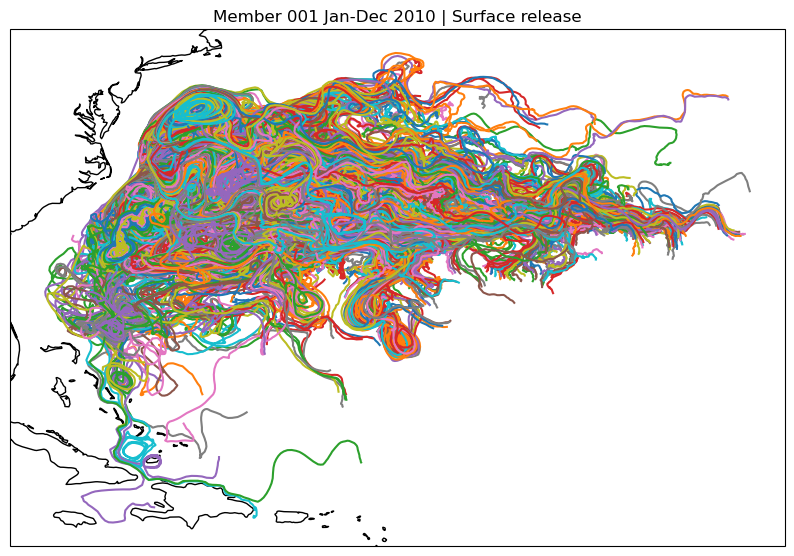

In [153]:
# plot the first 45 particles with land from cartopy
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.coastlines()
# ax.set_extent([-180, 180, -90, 90])

# for i in range(400):
ax.plot(p0.lon[:, :].T, p0.lat[:, :].T);
ax.set_title('Member 001 Jan-Dec 2010 | Surface release')

Text(0.5, 1.0, 'Member 002 Jan-Dec 2010 | Surface release')

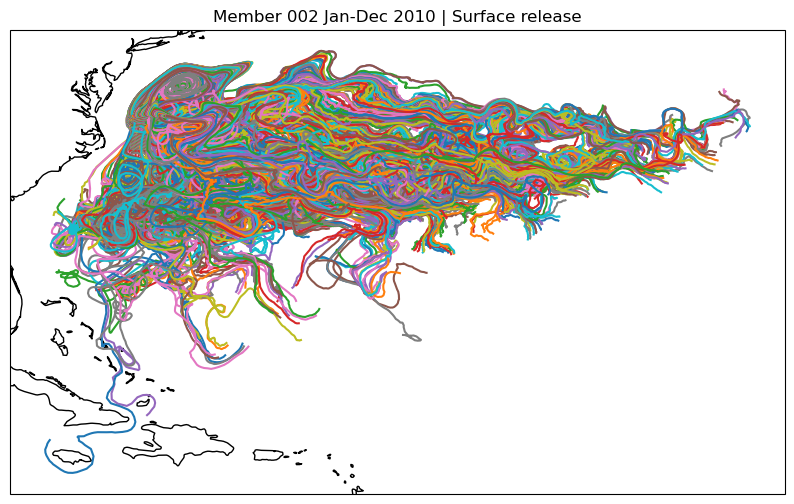

In [154]:
# plot the first 45 particles with land from cartopy
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.coastlines()
# ax.set_extent([-180, 180, -90, 90])

# for i in range(400):
ax.plot(p2.lon[:, :].T, p2.lat[:, :].T);
ax.set_title('Member 002 Jan-Dec 2010 | Surface release')

Text(0.5, 1.0, 'PDF m-001 Jan-Dec 2010')

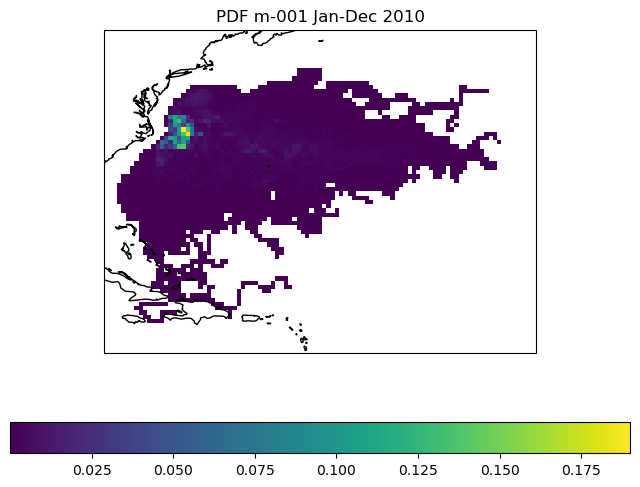

In [155]:
H = np.zeros((50, 40))

nx, ny = 101, 76
domain_limits = [[-80, -40], [15, 45]]
time = 0

h_p2, x_, y_ = np.histogram2d(p0.lon[:, time].T, p0.lat[:, time].T, bins=[nx, ny], range=domain_limits, density=True)

for time in range(1, 364):
    h_aux, x_, y_ = np.histogram2d(p0.lon[:, time].T, p0.lat[:, time].T, bins=[nx, ny], range=domain_limits, density=True)
    h_p0 += h_aux

h_p0[np.where(h_p0==0)] = np.nan
h_p0 = h_p0/364

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.coastlines()
im = ax.pcolormesh(x_, y_, h_p0.T)
fig.colorbar(im, orientation='horizontal')
ax.set_title('PDF m-001 Jan-Dec 2010')

Text(0.5, 1.0, 'PDF m-002 Jan-Dec 2010')

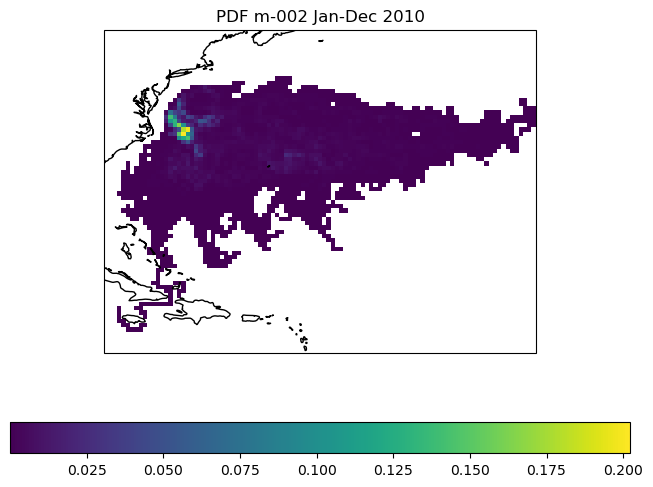

In [156]:
H = np.zeros((50, 40))

nx, ny = 101, 76
domain_limits = [[-80, -40], [15, 45]]
time = 0

h_p2, x_, y_ = np.histogram2d(p2.lon[:, time].T, p2.lat[:, time].T, bins=[nx, ny], range=domain_limits, density=True)

for time in range(1, 364):
    h_aux, x_, y_ = np.histogram2d(p2.lon[:, time].T, p2.lat[:, time].T, bins=[nx, ny], range=domain_limits, density=True)
    h_p2 += h_aux

h_p2[np.where(h_p2==0)] = np.nan
h_p2 = h_p2/363

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.coastlines()
im = ax.pcolormesh(x_, y_, h_p2.T)
fig.colorbar(im, orientation='horizontal')
ax.set_title('PDF m-002 Jan-Dec 2010')

Text(0.5, 1.0, 'Kullback–Leibler divergence ($D_{KL}(m_{001}||m_{002})$)')

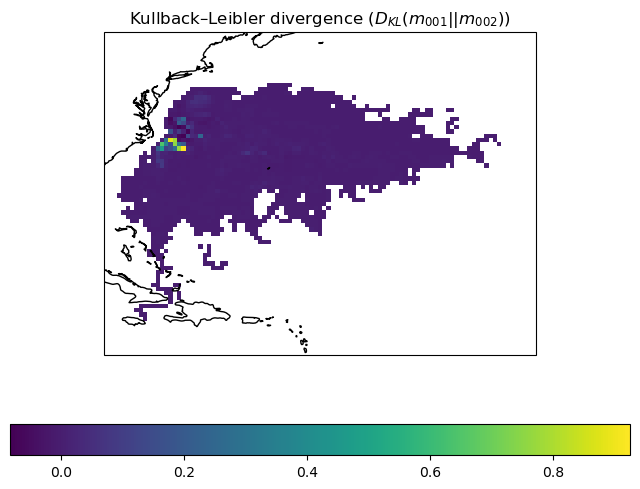

In [159]:
H = np.zeros((50, 40))

nx, ny = 101, 76
domain_limits = [[-80, -40], [15, 45]]
time = 0

h_p2, x_, y_ = np.histogram2d(p2.lon[:, time].T, p2.lat[:, time].T, bins=[nx, ny], range=domain_limits, density=True)

for time in range(1, 364):
    h_aux, x_, y_ = np.histogram2d(p2.lon[:, time].T, p2.lat[:, time].T, bins=[nx, ny], range=domain_limits, density=True)
    h_p2 += h_aux

h_p2[np.where(h_p2==0)] = np.nan
h_p2 = h_p2/363

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.coastlines()

KL = -h_p0*np.log2(h_p2/h_p0)

im = ax.pcolormesh(x_, y_, KL.T)
fig.colorbar(im, orientation='horizontal')
ax.set_title('Kullback–Leibler divergence ($D_{KL}(m_{001}||m_{002})$)')

In [135]:
np.log(h_p2/h_p0)

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [134]:
h_p0/h_p2

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [132]:
# compute the entropy of the distribution h_p0 and h_p2

h_p0 = h_p0.flatten()
h_p2 = h_p2.flatten()

h_p0 = h_p0[np.where(~np.isnan(h_p0)

6.379141552511402

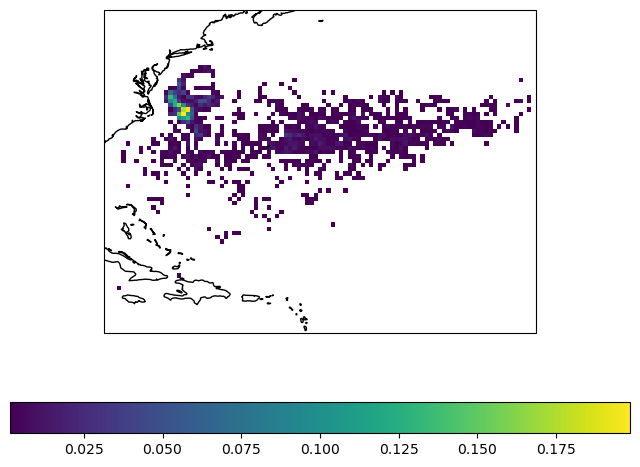

In [119]:
H = np.zeros((50, 40))

nx, ny = 101, 76
domain_limits = [[-80, -40], [15, 45]]
time = 363

h, x_, y_ = np.histogram2d(p2.lon[:, time].T, p2.lat[:, time].T, bins=[nx, ny], range=domain_limits, density=True)

h[np.where(h==0)] = np.nan

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.coastlines()

im = ax.pcolormesh(x_, y_, h.T)
fig.colorbar(im, orientation='horizontal')

In [84]:
domain_limits = [[-80, -40], [15, 45]]


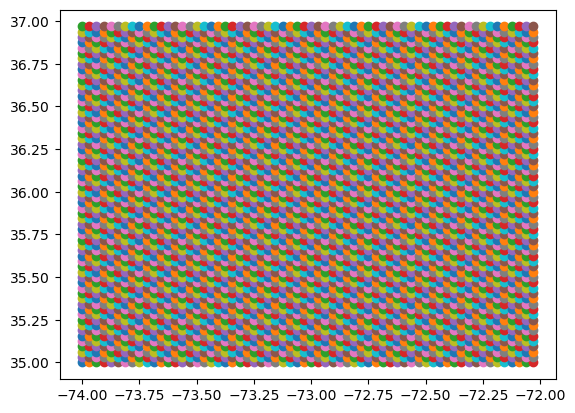

In [65]:
for i in  level_indexes[0]:
    plt.scatter(pset_1.lon[i, 0], pset_1.lat[i, 0])

In [49]:
pset_1.lon[::16, 0]

<xarray.DataArray 'lon' (trajectory: 4096)> Size: 33kB
dask.array<getitem, shape=(4096,), dtype=float64, chunksize=(4096,), chunktype=numpy.ndarray>
Coordinates:
    obs         int32 4B 0
  * trajectory  (trajectory) int64 33kB 0 16 32 48 ... 65472 65488 65504 65520
Attributes:
    axis:           X
    long_name:      
    standard_name:  longitude
    units:          degrees_east

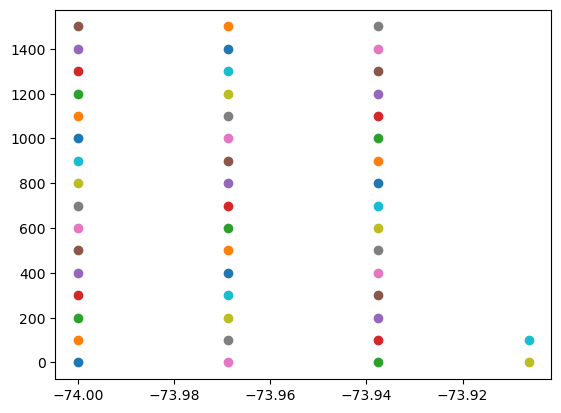

In [39]:
for i in range(50):
    plt.scatter(pset_1.lon[i, 0], pset_1.z[i, 0])

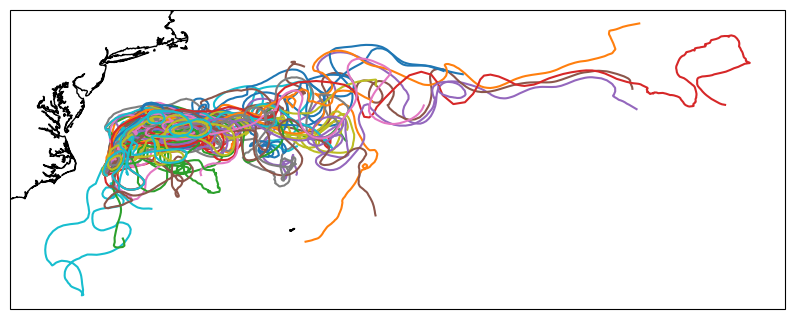

In [78]:
pset_23 = xr.open_zarr('/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/2015/PGS_2015_023.zarr')

# plot the first 45 particles with land from cartopy
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.coastlines()
# ax.set_extent([-180, 180, -90, 90])

for i in range(40):
    plt.plot(pset_23.lon[i, :], pset_23.lat[i, :])
    